In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from tqdm import tqdm
from mix_Network import *
from Event import Event

# Train the Hierarchical Network Step by Step
## Loading the events

In [3]:
image_list = [1, 32, 19, 22, 29]
event0 = Event(ImageSize=(32, 32))

event0.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=image_list)

## Training

In [4]:
hots = network(algo='lagorce', tau=10)

count = 0
nbevent = int(event0.time.shape[0])
pbar = tqdm(total=nbevent)
            
while count<nbevent-1:
    pbar.update(1)
    hots.count += 1
    count += 1
            
    hots.train(event0.address[count,1],event0.address[count,0],event0.time[count], event0.polarity[count])
            
pbar.close()

100%|█████████▉| 74456/74457 [01:42<00:00, 727.08it/s]


## Monitoring

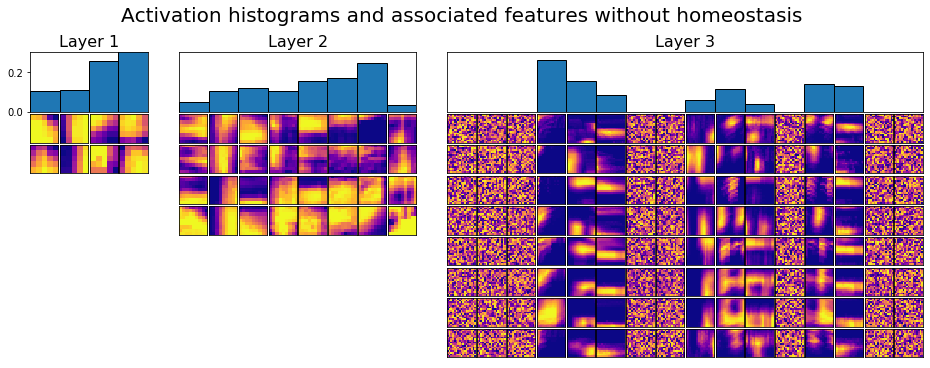

In [5]:
hots.plotlayer()

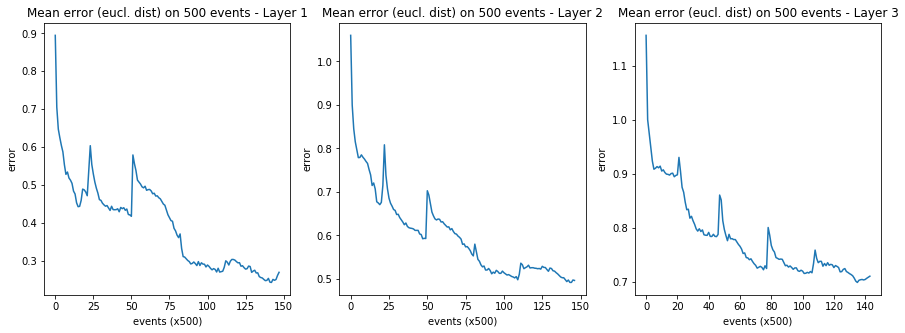

In [6]:
hots.plotconv()

# Running the trained network on a single image

In [7]:
## Loading and filter an image of a 8
event_sgl = Event(ImageSize=(32, 32))
event_sgl.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=22)

In [8]:
for i in range(len(hots.L)):
    hots.TS[i].spatpmat[:] = 0
    hots.TS[i].iev = 0

count = 0
nbevent = int(event_sgl.time.shape[0])
pbar = tqdm(total=nbevent)
while count<nbevent-1:
    pbar.update(1)
    hots.count += 1
    count += 1
            
    hots.run(event0.address[count,1],event0.address[count,0],event0.time[count], event0.polarity[count], to_record=True)
            
pbar.close()

100%|█████████▉| 14715/14716 [00:16<00:00, 913.54it/s] 


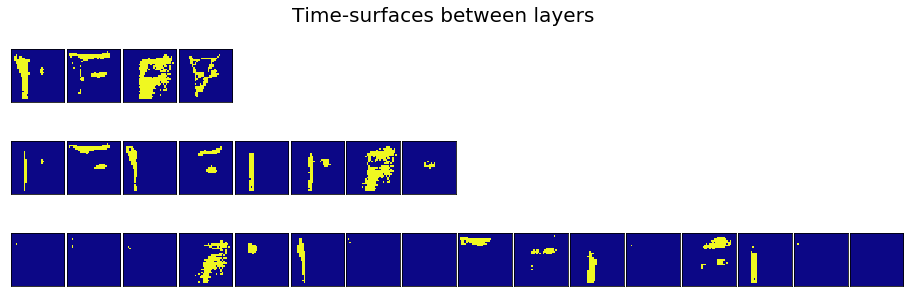

In [9]:
hots.plotactiv()